# Jumpman23 - Data Exploration & Anlaysis

Jumpman23 is an on-demand food delivery platform connecting customers to “Jumpman”, a vast network of couriers. Jumpman23 recently launched in its newest market, New York City.

In this section, we will used the cleaned csv file from the previous Jupyter Notebook to complete our analysis. We will dive into customer and merchant insights, delivery trends, and geographical distribution of orders.

In [1]:
import pandas as pd
import numpy as np
import folium
from folium import plugins
import matplotlib.pyplot as plt
import datetime as dt

In [6]:
#read the csv file
df = pd.read_csv("cleaned_data.csv")

#convert time columns to datetime objects
df['when_the_Jumpman_arrived_at_dropoff'] = pd.to_datetime(df['when_the_Jumpman_arrived_at_dropoff'])
df['when_the_Jumpman_left_pickup'] = pd.to_datetime(df['when_the_Jumpman_left_pickup'])
df['when_the_Jumpman_arrived_at_pickup'] = pd.to_datetime(df['when_the_Jumpman_arrived_at_pickup'])
df['when_the_delivery_started'] = pd.to_datetime(df['when_the_delivery_started'])

#drop Unnamed column
df.drop(['Unnamed: 0'],axis=1, inplace=True)

df.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,how_long_it_took_to_order_mins,total_time,transit_time,prep_time,wait_at_rest
0,1271706,66556,154943,car,CVS Pharmacy,NaN,NaN,NaN,NaN,NaN,...,-73.991519,2014-10-01 00:07:58.632482,NaT,NaT,2014-10-01 00:30:21.109149,NaN,22.374611,NaN,NaN,NaN
1,1271751,104131,124897,bicycle,Duane Reade,Drug Store,NaN,NaN,NaN,NaN,...,-73.967106,2014-10-01 00:26:31.924774,2014-10-01 00:39:31.086322,2014-10-01 00:59:57.522402,2014-10-01 01:04:14.355157,NaN,37.707173,4.280546,33.426627,20.440601
2,1271867,121706,124897,bicycle,McDonald's,Fast Food,World Famous Fries,2.0,Snacks & Sides,NaN,...,-73.998153,2014-10-01 01:00:06.756350,2014-10-01 01:19:29.205722,2014-10-01 01:36:49.131316,2014-10-01 01:49:29.034932,NaN,49.371310,12.665060,36.706249,17.332093
3,1272279,304449,112830,bicycle,Friend of a Farmer,American,Bacon,1.0,Sides,00:09:08.75807,...,-73.982436,2014-10-01 08:46:15.935061,2014-10-01 09:02:40.003541,2014-10-01 09:15:59.607582,2014-10-01 09:28:40.095456,9.145968,42.402673,12.674798,29.727875,13.326734
4,1272303,107621,127812,bicycle,Duane Reade duplicate,Convenience Store,NaN,NaN,NaN,NaN,...,-73.985617,2014-10-01 09:20:21.573801,2014-10-01 09:26:01.194532,2014-10-01 09:37:56.158669,2014-10-01 09:39:41.631246,NaN,19.334291,1.757876,17.576414,11.916069


## Order Statistics

Let's begin by summarizing some basic order statistics.

In [3]:
#total number of orders
print('total number of orders: ', df['delivery_id'].count())

#total jumpman
print('total jumpmen: ', df['jumpman_id'].drop_duplicates().count())

#total merchants
print('total merchants: ', df['pickup_place'].drop_duplicates().count())

#total_customers
print('total customers: ', df['customer_id'].drop_duplicates().count())


total number of orders:  5214
total jumpmen:  578
total merchants:  898
total customers:  3192


## Delivery Trends

### Number of deliveries per day

To get the number of deliveries per day, we need group the data by day, and then count the number of deliveries for each day. 

Text(0.5, 1.0, 'Number of new deliveries per day in October')

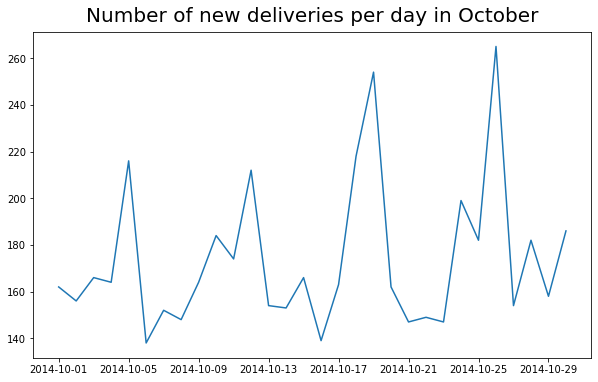

In [10]:
new_deliveries_day = (df.groupby(pd.Grouper(key='when_the_delivery_started', freq='D'))
                     ['delivery_id'].count()
                     .to_frame(name = 'number_of_deliveries')
                     .reset_index() 
                    )

#plot of new deliveries per day in October
plt.figure(figsize=(10,6))
plt.plot(new_deliveries_day['when_the_delivery_started'], new_deliveries_day['number_of_deliveries'])
plt.title('Number of deliveries per day in October', fontsize=20, pad=10)


### Weekly Delivery Trends

Similarily, to get the number of deliveries per week day, we group the data by week day, and then count the number of delvieries. 

Text(0.5, 1.0, 'Weekly Trends')

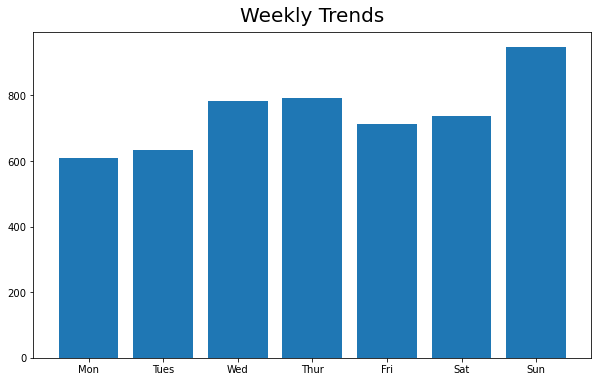

In [33]:
week_df = (df.groupby(df['when_the_delivery_started'].dt.weekday)['delivery_id'].count()
                        .to_frame(name = 'number_of_deliveries')
                        .reset_index())
week_df

#plot number of deliveries per weekday
plt.figure(figsize=(10,6))
positions = (0,1, 2, 3,4,5,6)
labels = ("Mon", "Tues", "Wed","Thur","Fri","Sat","Sun")
plt.xticks(positions, labels)
plt.bar(week_df['when_the_delivery_started'], week_df['number_of_deliveries'])
plt.title('Weekly Trends', fontsize=20, pad=10)

### Hourly Delivery Trends

Text(0.5, 1.0, 'Hourly Trends')

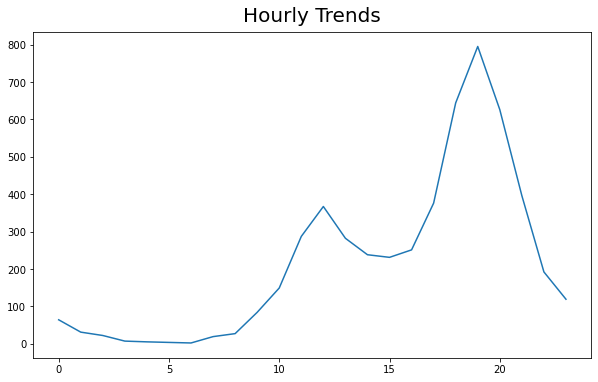

In [36]:
hourly = (df.groupby(df['when_the_delivery_started'].dt.hour)['delivery_id'].count()
                        .to_frame(name = 'number_of_deliveries')
                        .reset_index())
hourly

#plot of new deliveries per day in October
plt.figure(figsize=(10,6))
plt.plot(hourly['when_the_delivery_started'], hourly['number_of_deliveries'])
plt.title('Hourly Trends', fontsize=20, pad=10)

### Transportation Trends

The most popular mode of transportation for jumpmen are bicycles. Biking, walking, motorcycles have the fast delivery time, averaging around 45 minutes. Cars are slower, with an average of 51 minutes, which makes sense because of NYC's traffic. 

In [43]:
#frequency of vehicle type used by jumpmen
df.groupby(['vehicle_type'])['delivery_id'].count().sort_values(ascending=False)

vehicle_type
bicycle       3740
car           1050
walker         234
van             69
scooter         64
truck           38
motorcycle      19
Name: delivery_id, dtype: int64

In [44]:
#length of time for each vehicle type (in minutes)
df.groupby(['vehicle_type'])['total_time'].mean().sort_values(ascending=False)


vehicle_type
truck         61.304430
car           51.077749
van           50.749618
scooter       46.871671
walker        45.643702
motorcycle    45.022847
bicycle       43.251084
Name: total_time, dtype: float64

### Delivery Time Statistics

The average prep time is almost twice as long as the average transit time. The Jumpman spends an average of 18 minutes at the pickup location waiting for the order to be prepared, which is time the Jumpman can spend deleviring another order. We will discuss how Jumpman23 can optimize it's operations by preparing meals in advance in the next section.

In [63]:
#average time spent at each step of the order

print('average time customer took to order: ',df['how_long_it_took_to_order_mins'].mean())
print('average prep time: ',df['prep_time'].mean())
print('average wait at pickup location: ',df['wait_at_rest'].mean())
print('average transit time: ',df['transit_time'].mean())
print('average total delivery time: ',df['total_time'].mean())


average time customer took to order:  7.698968279959945
average prep time:  30.882987566468845
average wait at pickup location:  18.294247579815686
average transit time:  14.0414801562019
average total delivery time:  45.21630814929022


Text(0.5, 1.0, 'Average Time Spent at Each Step')

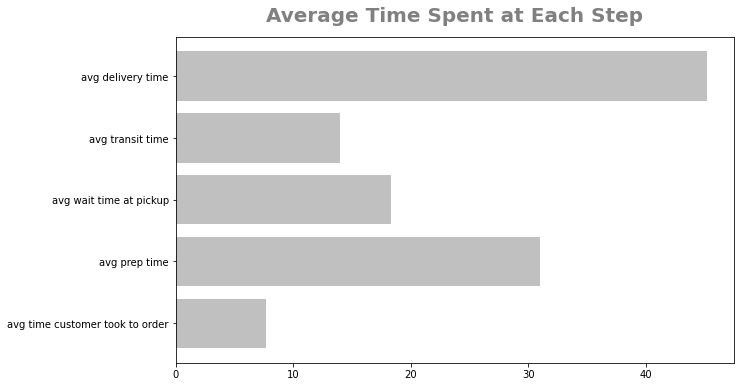

In [142]:
x = ['avg time customer took to order', 'avg prep time', 'avg wait time at pickup', 'avg transit time', 'avg delivery time']
y = [7.7, 31.0, 18.3, 14.0, 45.2]


plt.figure(figsize=(10,6))
plt.barh(x, y, align='center', color='silver')
plt.title('Average Time Spent at Each Step', fontsize=20, pad=15, color='gray', weight='bold')



## Customer Insights

### Customer Order Frequency

The data shows that only 30% of customers are ordering more than once, and even less who order more than twice. 

In [69]:
#total number of customers
customer_counts = df.groupby(['customer_id'])['delivery_id'].count().sort_values(ascending=False).to_frame(name = 'order_counts').reset_index()
print("total number of customers: ", customer_counts.shape[0])

#number of customers who ordered more than once
more_than_once = customer_counts.loc[customer_counts['order_counts']>1]
print("Number of customers who ordered more than once: ", more_than_once.shape[0], 'or', (more_than_once.shape[0]/customer_counts.shape[0])*100, '%')


#customers who ordered more than 2 times
more_than_twice = customer_counts.loc[customer_counts['order_counts']>2]
print("Number of customers who ordered more than 2 times: ", more_than_twice.shape[0], 'or', (more_than_twice.shape[0]/customer_counts.shape[0])*100, '%')

#customers who ordered more than 3 times
more_than_3 = customer_counts.loc[customer_counts['order_counts']>3]
print("Number of customers who ordered more than 3 times: ", more_than_3.shape[0], 'or', (more_than_3.shape[0]/customer_counts.shape[0])*100, '%')

#customers who ordered more than 4 times
more_than_4 = customer_counts.loc[customer_counts['order_counts']>4]
print("Number of customers who ordered more than 4 times: ", more_than_4.shape[0], 'or', (more_than_4.shape[0]/customer_counts.shape[0])*100, '%')



total number of customers:  3192
Number of customers who ordered more than once:  976 or 30.576441102756892 %
Number of customers who ordered more than 2 times:  464 or 14.536340852130325 %
Number of customers who ordered more than 3 times:  232 or 7.268170426065162 %
Number of customers who ordered more than 4 times:  126 or 3.9473684210526314 %


### New Customers per Day

To get the number of new customers per day, we first create a temporary dataframe and drop any reoccuring customer_id's. Now that we have a dataframe with only unique customer ids, we can then group by day, and count the number of deliveries. 

Here, we see that Jumpman23 acquired average of 106.4 new customers per day. The number of new customers acquired per day also appears to be declining over the month. 

mean new customers per day:  106.4


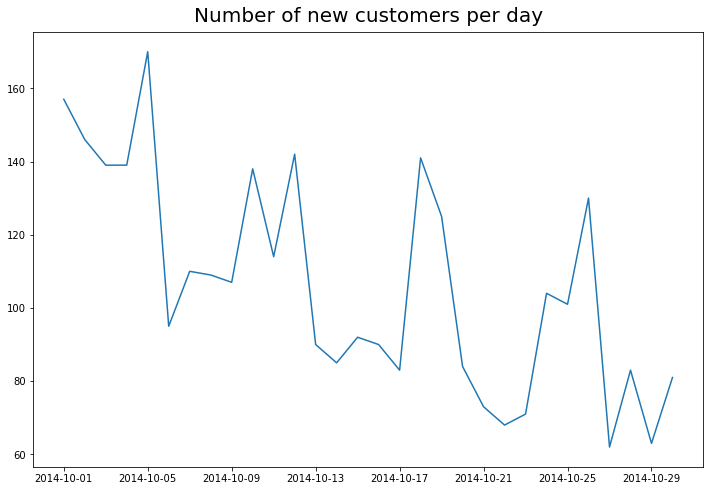

In [76]:
#number of new customers per day
temp = df.copy()
temp.sort_values('when_the_delivery_started',inplace=True)
temp.drop_duplicates(subset = ['customer_id'], keep = 'first', inplace = True) 
new_customers_day = (temp.groupby(pd.Grouper(key='when_the_delivery_started', freq='D'))
                     ['customer_id'].count()
                     .to_frame(name = 'new_customers')
                     .reset_index() 
                    )

#MEAN new customers per day
mean_new_customers_day = new_customers_day['new_customers'].mean()
print('mean new customers per day: ', mean_new_customers_day)

#plot new customers per day in October
plt.figure(figsize=(12,8))
plt.title("Number of new customers per day", fontsize=20, pad=10)
plt.plot(new_customers_day['when_the_delivery_started'], new_customers_day['new_customers']);


## Merchant Insights
### Top 10 Categories and Merchants

In [72]:
#Top 10 Categories
df.groupby(['place_category'])['delivery_id'].count().sort_values(ascending=False).head(10)


place_category
Italian          437
Burger           395
American         357
Japanese         335
Dessert          277
Chinese          265
Sushi            203
Salad            192
Mexican          165
Grocery Store    130
Name: delivery_id, dtype: int64

In [74]:
# Top 10 Merchants
df.groupby(['pickup_place'])['delivery_id'].count().sort_values(ascending=False).head(10)

pickup_place
Shake Shack                              266
Momofuku Milk Bar                        162
The Meatball Shop                        153
sweetgreen                               138
Blue Ribbon Fried Chicken                115
Blue Ribbon Sushi                        111
Parm                                      89
Whole Foods Market                        85
Chipotle Mexican Grill $1.99 Delivery     79
Mighty Quinn's BBQ                        76
Name: delivery_id, dtype: int64

### Merchant Prep Time

The average prep time is 31 minutes, and the average time the Jumpman waits at the pickup location is around 18 minutes. From the histogram, we see that most merchants take between 10-45 minutes to prepare orders. 

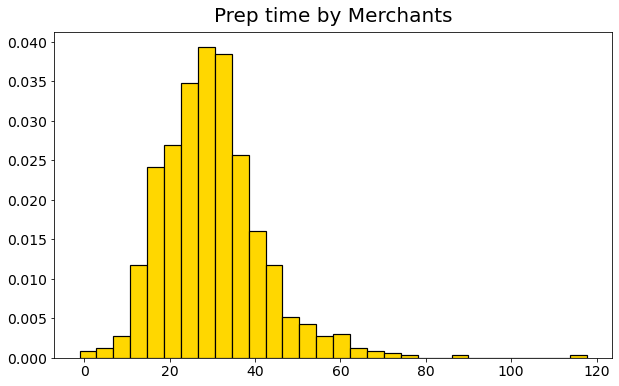

In [77]:
#histogram of prep time, sorted by pickup location
prep_time = df.groupby(['pickup_place'])['prep_time'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Prep time by Merchants", fontsize=20, pad=10)
plt.hist(prep_time['prep_time'],density=True, bins=30, color='gold', edgecolor='black', linewidth=1.2);

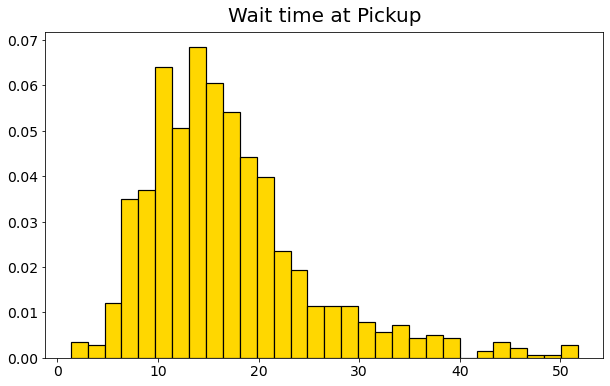

In [78]:
#histogram of wait_at_rest time (time the jumpman is waiting at the pickup location), sorted by pickup location
wait_at_rest = df.groupby(['pickup_place'])['wait_at_rest'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Wait time at Pickup", fontsize=20, pad=10)
plt.hist(wait_at_rest['wait_at_rest'],density=True, bins=30, color='gold', edgecolor='black', linewidth=1.2);

## Geographical Distributions

Now we begin the exciting part of the data analysis, where we can plot the visualizations of the dropoff and pickup locations using a folium heatmap!

In [143]:
pickup = folium.Map(location=[40.744607, -73.990742],tiles='stamentoner', zoom_start=12)

#to plot individual points
# for index, row in df.iterrows():
#     folium.CircleMarker([row['dropoff_lat'], row['dropoff_lon']],
#     radius=1,
#     fill_color="3db7e4", # divvy color
#     ).add_to(dropoff)
    
# convert to (n, 2) nd-array format for heatmap
cus = df[['pickup_lat', 'pickup_lon']].to_numpy()

# plot heatmap
pickup.add_child(plugins.HeatMap(cus, radius=15))
 

pickup

In [145]:
dropoff = folium.Map(location=[40.744607, -73.990742],tiles='stamentoner', zoom_start=12)

##to plot individual points
# for index, row in df.iterrows():
#     folium.CircleMarker([row['dropoff_lat'], row['dropoff_lon']],
#     radius=1,
#     fill_color="3db7e4", # divvy color
#     ).add_to(dropoff)
    
# convert to (n, 2) nd-array format for heatmap
cus = df[['dropoff_lat', 'dropoff_lon']].to_numpy()

# plot heatmap
dropoff.add_child(plugins.HeatMap(cus, radius=15))
 

dropoff

In [149]:
from IPython.display import HTML

dropoff.save('dropoff.html')


Comparing the heatmap of the pickup locations vs the dropoff locations, we see that drop-off locations are more spread out in Upper Manhattan and Brooklyn/Queens, and pickup locations are centred in lower manhatten and midtown. Jumpman23 should consider growing their merchant partners in Brooklyn, where this is a higher dropoff vs pickup rate. 

### Analysis by Borough

I decided to dive deeper into the data to compare Jumpman23's performance in Manhatten, Brooklyn, and Queens.
To do this, I first clipped the geographical data into boroughs using geopandas. I downloaded a dataset from New York City Open Data, which contained all the latitude and longtitude data and polygon information for all three boroughs. Once I successfully clipped the data and sorted the orders by borough, it was finally ready for analysis.

In [98]:
# Clip the dataframe into distinct boroughs (Manhattan, Brooklyn, and Queens)

from folium import plugins
import geopandas as gpd
import descartes
#import geoplot
from shapely.geometry import Point, Polygon


#read the boroughs data pulled from NYC open data
boroughs = gpd.read_file('boroughs.geojson')
boroughs = boroughs.drop([boroughs.index[1]]) #removes Staten Island row, since we don't need it

#create geo points from lat and lon info for BOTH pickup and dropoff locations
gdf_pickups = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.pickup_lon, df.pickup_lat))
df['geometry_pickup'] = df['geometry']
gdf_dropoffs = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.dropoff_lon, df.dropoff_lat))
df['geometry_dropoff'] = df['geometry']


# Function that seperates data by BOROUGH
def bourough_check(series,label):
    global boroughs
    if series[label].within(boroughs.loc[boroughs['boro_name']=="Bronx",'geometry'].iloc[0]):
        return "Bronx"
    elif series[label].within(boroughs.loc[boroughs['boro_name']=="Manhattan",'geometry'].iloc[0]):
        return "Manhattan"
    elif series[label].within(boroughs.loc[boroughs['boro_name']=="Brooklyn",'geometry'].iloc[0]):
        return "Brooklyn"
    elif series[label].within(boroughs.loc[boroughs['boro_name']=="Queens",'geometry'].iloc[0]):
        return "Queens"
    else:
        return "Undefined"


#create a column in the df that contains the borough name of the dropoff and pickup location
df['borough_pickup']=df.apply(lambda x: bourough_check(x,'geometry_pickup'),axis=1)
df['borough_dropoff']=df.apply(lambda x: bourough_check(x,'geometry_dropoff'),axis=1)


In [99]:
df.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,how_long_it_took_to_order_mins,total_time,transit_time,prep_time,wait_at_rest,geometry,geometry_pickup,geometry_dropoff,borough_pickup,borough_dropoff
0,1271706,66556,154943,car,CVS Pharmacy,NaN,NaN,NaN,NaN,NaN,...,NaN,22.374611,NaN,NaN,NaN,POINT (-73.99152 40.74408),POINT (-73.99199 40.74416),POINT (-73.99152 40.74408),Manhattan,Manhattan
1,1271751,104131,124897,bicycle,Duane Reade,Drug Store,NaN,NaN,NaN,NaN,...,NaN,37.707173,4.280546,33.426627,20.440601,POINT (-73.96711 40.76534),POINT (-73.96761 40.76322),POINT (-73.96711 40.76534),Manhattan,Manhattan
2,1271867,121706,124897,bicycle,McDonald's,Fast Food,World Famous Fries,2.0,Snacks & Sides,NaN,...,NaN,49.371310,12.665060,36.706249,17.332093,POINT (-73.99815 40.75680),POINT (-73.98790 40.75680),POINT (-73.99815 40.75680),Manhattan,Manhattan
3,1272279,304449,112830,bicycle,Friend of a Farmer,American,Bacon,1.0,Sides,00:09:08.75807,...,9.145968,42.402673,12.674798,29.727875,13.326734,POINT (-73.98244 40.73302),POINT (-73.98680 40.73679),POINT (-73.98244 40.73302),Manhattan,Manhattan
4,1272303,107621,127812,bicycle,Duane Reade duplicate,Convenience Store,NaN,NaN,NaN,NaN,...,NaN,19.334291,1.757876,17.576414,11.916069,POINT (-73.98562 40.74496),POINT (-73.98400 40.74317),POINT (-73.98562 40.74496),Manhattan,Manhattan


The df now contains two new columns: borough_pickup and borough_dropoff! We can now do some borough specific analysis.

In [100]:
#total number of dropoff locations by borough
df.groupby(['borough_dropoff'])['delivery_id'].count()

borough_dropoff
Brooklyn      205
Manhattan    5004
Queens          5
Name: delivery_id, dtype: int64

In [105]:
#total number of merchants by borough
df.groupby(['borough_pickup'])['pickup_place'].count()

borough_pickup
Brooklyn      186
Manhattan    5027
Queens          1
Name: pickup_place, dtype: int64

In [101]:
#deliveries ordered by dropoff then pickup
df.groupby(['borough_dropoff', 'borough_pickup'])['delivery_id'].count()

borough_dropoff  borough_pickup
Brooklyn         Brooklyn           166
                 Manhattan           39
Manhattan        Brooklyn            19
                 Manhattan         4985
Queens           Brooklyn             1
                 Manhattan            3
                 Queens               1
Name: delivery_id, dtype: int64

From this table, we see that the majority of orderes delivered to Manhatten are from Manhattan. In Brooklyn, there are 58 orderes that arrived from outside of Brooklyn. 

In [107]:
#delivery times by borough
df.groupby(['borough_dropoff'])['how_long_it_took_to_order_mins','total_time', 'transit_time', 'prep_time', 'wait_at_rest'].mean()


<ipython-input-107-6545b0670ddd>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['borough_dropoff'])['how_long_it_took_to_order_mins','total_time', 'transit_time', 'prep_time', 'wait_at_rest'].mean()


,how_long_it_took_to_order_mins,total_time,transit_time,prep_time,wait_at_rest
borough_dropoff,,,,,
Brooklyn,8.036933,48.942025,14.895938,33.871305,17.627930
Manhattan,7.679513,45.045888,13.987738,30.758009,18.318112
Queens,14.717708,63.018095,30.742856,32.275239,21.607755


In [109]:
#breakdown of delivery time by borough
df.groupby(['borough_dropoff', 'borough_pickup'])['how_long_it_took_to_order_mins','total_time', 'transit_time', 'prep_time', 'wait_at_rest'].mean()


<ipython-input-109-8269a0402324>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['borough_dropoff', 'borough_pickup'])['how_long_it_took_to_order_mins','total_time', 'transit_time', 'prep_time', 'wait_at_rest'].mean()


how_long_it_took_to_order_mins  total_time  \
borough_dropoff borough_pickup                                               
Brooklyn        Brooklyn                              7.873121   45.036403   
                Manhattan                             8.700370   65.565954   
Manhattan       Brooklyn                             10.741377   86.082997   
                Manhattan                             7.663352   44.889478   
Queens          Brooklyn                             14.506486   64.662429   
                Manhattan                            14.928929   71.489408   
                Queens                                     NaN   35.959823   

                                transit_time  prep_time  wait_at_rest  
borough_dropoff borough_pickup                                         
Brooklyn        Brooklyn           12.222561  33.045759     17.621246  
                Manhattan          26.926131  37.586264     17.658006  
Manhattan       Brooklyn           34.917599  43.252414     18.240700  
                Manhattan          13.908845  30.710913     18.318404  
Queens          Brooklyn           20.118906  44.543523     17.380730  
                Manhattan          42.044199  29.445209     22.107407  
                Queens              7.462776  28.497047     24.335822

In [113]:
#transportaion analysis by borough
df.groupby(['borough_dropoff','vehicle_type'])['delivery_id'].count()

borough_dropoff  vehicle_type
Brooklyn         bicycle          111
                 car               87
                 scooter            1
                 truck              5
                 van                1
Manhattan        bicycle         3625
                 car              963
                 motorcycle        19
                 scooter           63
                 truck             33
                 van               67
                 walker           234
Queens           bicycle            4
                 van                1
Name: delivery_id, dtype: int64

To summarize the analysis above, we see that, on average, customers take almost twice as long to order in Queens, which may be due to the limited options available. Delivery to Queens can take up to 44% longer than deliveries to  Manhattan or Brooklyn because transit time is almost twice as long. Deliveries from Brooklyn to Manhattan, or vice versa, can take twice as long as delivering within the same borough. This is not so much a problem for Manhatten since very few orders are from Brooklyn; however, 20% of orders to Brooklyn arrive from Manhattan. 

Lastly, biking is the most popular form of transportation for all three boroughs. Manhattan is the only borough where jumpmen can walk!